In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import seaborn as sns

In [2]:
#file = 'clean_eguage_hour_dataset.csv'

file = 'median_clean_eguage_hour_dataset.csv'

In [3]:
data = pd.read_csv(file)

In [4]:
data.columns

Index(['localhour', 'state', 'city', 'building_type', 'month', 'time', 'hour',
       'weekday', 'air1', 'furnace1', 'refrigerator1', 'air2', 'car1', 'drye1',
       'poolpump1', 'waterheater1', 'livingroom1', 'lights_plugs1', 'furnace2',
       'office1', 'dishwasher1', 'bedroom1', 'jacuzzi1'],
      dtype='object')

In [5]:
data.shape

(4681705, 23)

In [6]:
data.head()

,localhour,state,city,building_type,month,time,hour,weekday,air1,furnace1,...,drye1,poolpump1,waterheater1,livingroom1,lights_plugs1,furnace2,office1,dishwasher1,bedroom1,jacuzzi1
0,2015-01-07 16:00:00-06:00,Texas,Austin,Single-Family Home,1,16:00:00,16,Weekday,0.0,0.007000,...,0.000000,0.505621,0.198917,0.114672,0.055216,0.084282,0.098459,0.0,0.036082,0.067749
1,2015-01-01 00:00:00-06:00,Texas,Austin,Single-Family Home,1,00:00:00,0,Weekday,0.0,0.169267,...,0.003617,0.379417,0.145688,0.081652,0.047012,0.102120,0.105259,0.0,0.037840,0.045157
2,2015-01-01 01:00:00-06:00,Texas,Austin,Single-Family Home,1,01:00:00,1,Weekday,0.0,0.223817,...,0.003400,0.370550,0.146686,0.062823,0.041560,0.090775,0.096395,0.0,0.035923,0.067457
3,2015-01-01 02:00:00-06:00,Texas,Austin,Single-Family Home,1,02:00:00,2,Weekday,0.0,0.133800,...,0.001817,0.384681,0.116055,0.056300,0.038971,0.105281,0.091374,0.0,0.035108,0.064672
4,2015-01-01 03:00:00-06:00,Texas,Austin,Single-Family Home,1,03:00:00,3,Weekday,0.0,0.122317,...,0.001867,0.427062,0.107802,0.052568,0.038132,0.122752,0.091826,0.0,0.034938,0.067693


In [7]:
x_train = data[data['state'] != 'California']

In [8]:
x_test = data[data['state'] == 'California']

In [9]:
# drop columns not needed for training
x_train = x_train.drop(['localhour', 'state', 'city', 'building_type', 'month', 'time', 'hour',
       'weekday'], axis = 1)

In [10]:
# drop columns not needed for training
x_test = x_test.drop(['localhour', 'state', 'city', 'building_type', 'month', 'time', 'hour',
       'weekday'], axis = 1)

In [12]:
x_train =  x_train.values
x_test  = x_test.values

In [13]:
X_train =  x_train
X_test  = x_test

In [14]:

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt


In [15]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.optimizers import Adam
from keras import initializers

Using TensorFlow backend.


In [16]:
# latent space dimension
latent_dim = 15

# imagem dimension 28x28
img_dim = x_train.shape[1]

init = initializers.RandomNormal(stddev=0.02)

# Generator network
generator = Sequential()

# Input layer and hidden layer 1
generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 2
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 3
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Output layer 
generator.add(Dense(img_dim, activation='tanh'))

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
# prints a summary representation of your model
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2048      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
__________

### Discriminator

In [18]:
# Discriminator network
discriminator = Sequential()

# Input layer and hidden layer 1
discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Output layer
discriminator.add(Dense(1, activation='sigmoid'))

In [19]:
# prints a summary representation of your model
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               2048      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total para

### Compile model

In [20]:
# Optimizer
optimizer = Adam(lr=0.0002, beta_1=0.5)

discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

## Combine network

In [21]:
discriminator.trainable = False

d_g = Sequential()
d_g.add(generator)
d_g.add(discriminator)
d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [22]:
# prints a summary representation of your model
d_g.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 15)                177935    
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 167169    
Total params: 345,104
Trainable params: 176,143
Non-trainable params: 168,961
_________________________________________________________________


### Fit model

In [23]:
epochs = 15
batch_size = 128
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):
        
        # Train Discriminator weights
        discriminator.trainable = True
        
        # Real samples
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real * (1 - smooth))
        
        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)
         
        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
        # Train Generator weights
        discriminator.trainable = False
        d_g_loss_batch = d_g.train_on_batch(x=z, y=real)
   
        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train) // batch_size, d_loss_batch, d_g_loss_batch[0]),
            100*' ',
            end='\r'
        )
    
    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], d_g_loss[-1]), 100*' ')

    

Instructions for updating:
Use tf.cast instead.
epoch = 1/15, d_loss=0.179, g_loss=4.415                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

epoch = 9/15, d_loss=0.200, g_loss=7.267                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
epoch = 10/15, d_loss=0.229, g_loss=

### Evaluate model

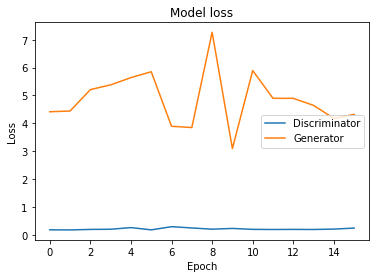

In [24]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Generator'], loc='center right')
plt.show()

### Use California data to test model

In [25]:

samples = X_test.shape[0]
california_pred = generator.predict(X_test)



In [26]:
plot_title = list(data.columns[-15:])

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


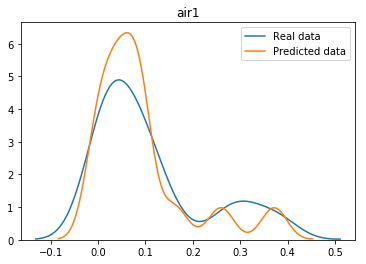

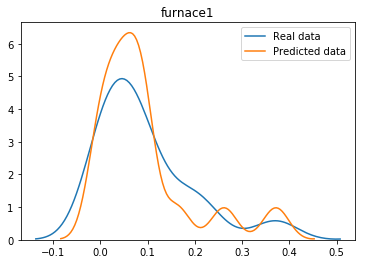

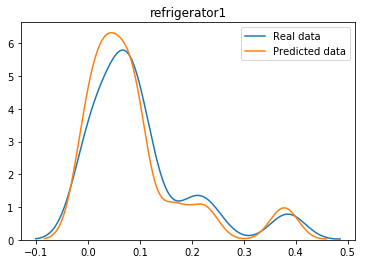

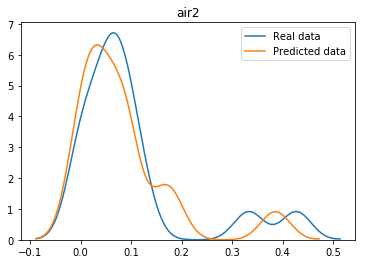

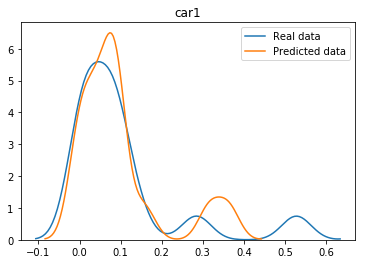

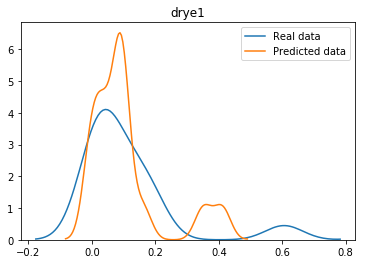

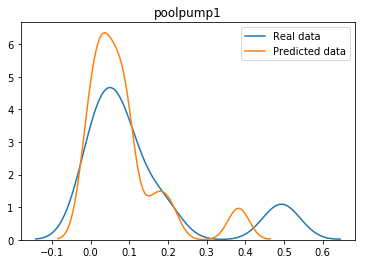

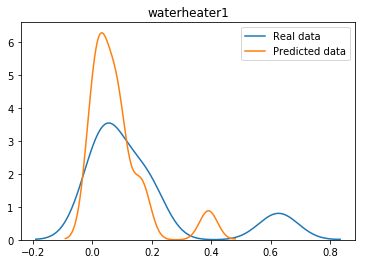

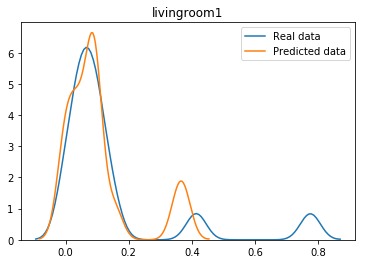

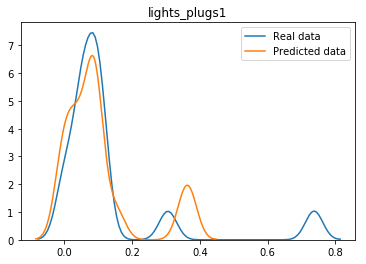

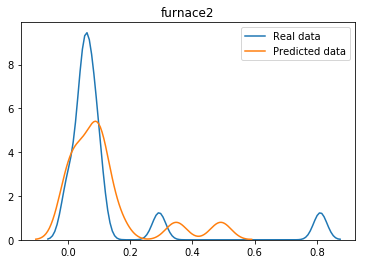

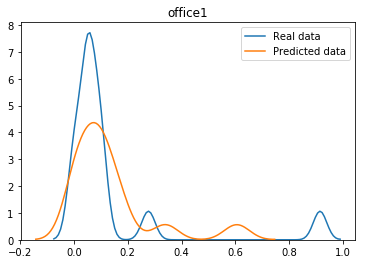

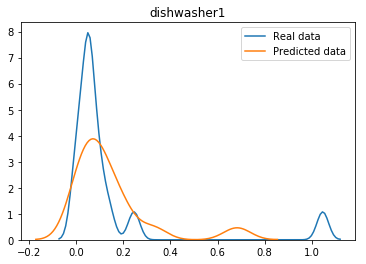

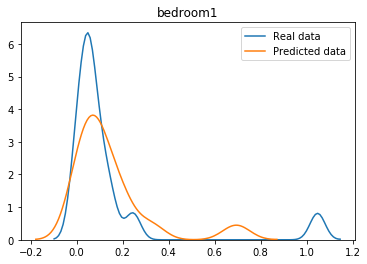

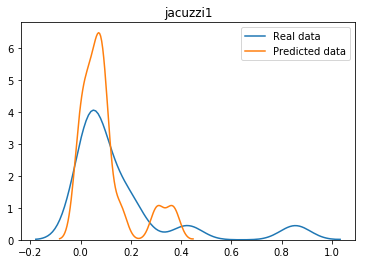

In [27]:
import seaborn as sns;

#looping through all the columns to compare the reconstructed data and the real data
for i in range(15):
    sns.kdeplot(x_test[i],  label="Real data")
    sns.kdeplot(california_pred[i], label="Predicted data")
    plt.title(plot_title[i])
    plt.legend();
    plt.show()
    

### Use Random noise

In [28]:
samples = X_test.shape[0]
x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, latent_dim)))


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


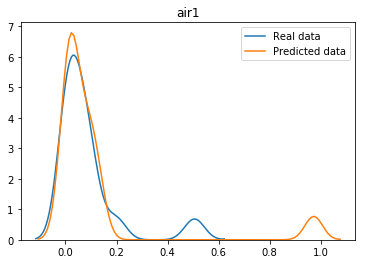

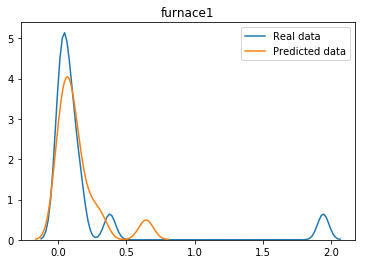

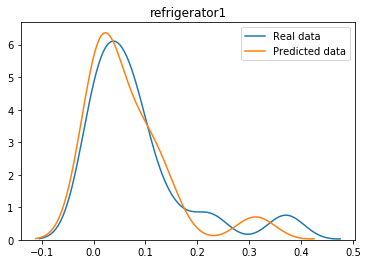

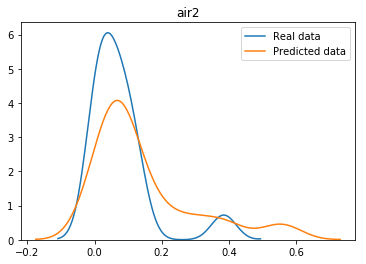

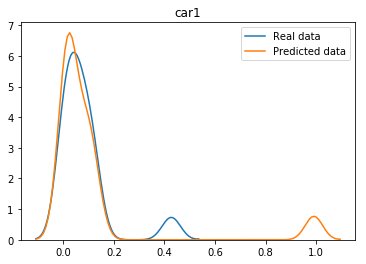

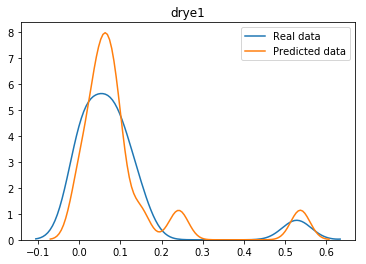

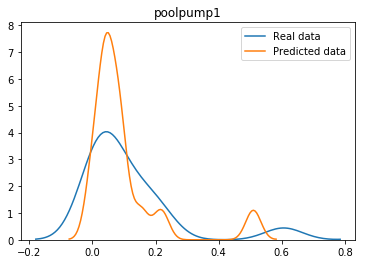

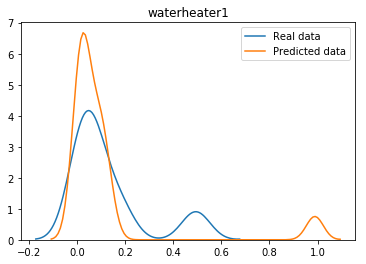

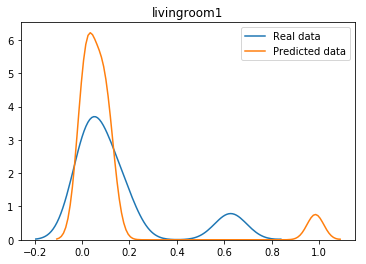

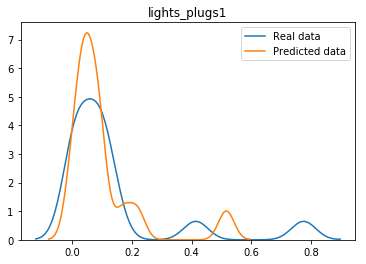

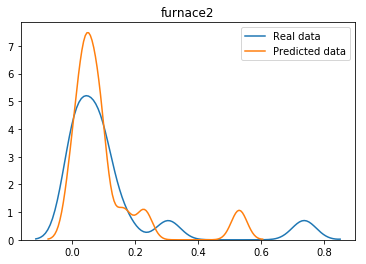

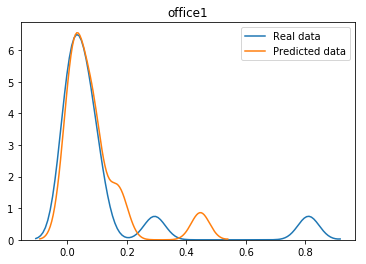

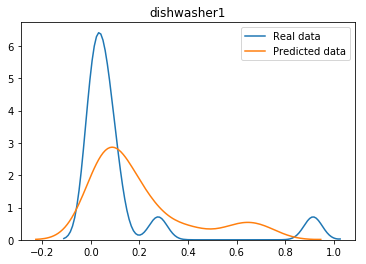

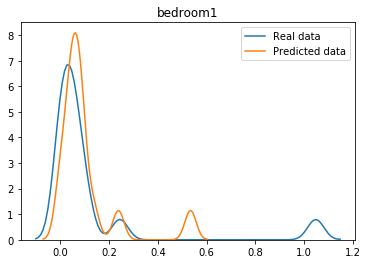

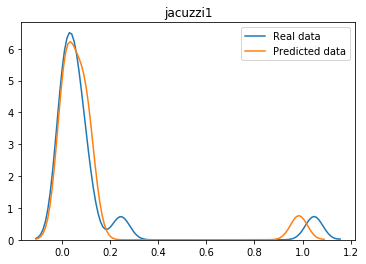

In [30]:
import seaborn as sns;

#looping through all the columns to compare the reconstructed data and the real data
for i in range(15):
    sns.kdeplot(x_train[i],  label="Real data")
    sns.kdeplot(x_fake[i], label="Predicted data")
    plt.title(plot_title[i])
    plt.legend();
    plt.show()
    